In [1]:
import os, glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display

import sys
sys.path.append('..')
import helpers, datasets, surfaces, matrices

sns.set_style('ticks')

/home/asaberi/laminar_organization/env/lib/python3.9/site-packages/nilearn/datasets/__init__.py:93: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


Map of Yeo networks:

![yeo](https://github.com/ThomasYeoLab/CBIG/raw/master/stable_projects/brain_parcellation/Yeo2011_fcMRI_clustering/readme_figures/Yeo2011_network_parcellation_fs5.png)

Mean LTC within/between networks:

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Calculating p-value with permutation testing (1000 permutations)
Perm 0
Perm 100
Perm 200
Perm 300
Perm 400
Perm 500
Perm 600
Perm 700
Perm 800
Perm 900


,intra,inter,pvals
Visual,0.950039,-0.235447,0.012
Somatomotor,0.399902,-0.032586,0.075
Dorsal attention,0.571410,-0.045271,0.011
Ventral attention,0.293591,0.047710,0.054
Limbic,0.294859,0.027221,0.673
Frontoparietal,0.215129,0.047115,0.233
Default,0.139656,0.061435,0.301
All,0.407527,-0.041251,0.000


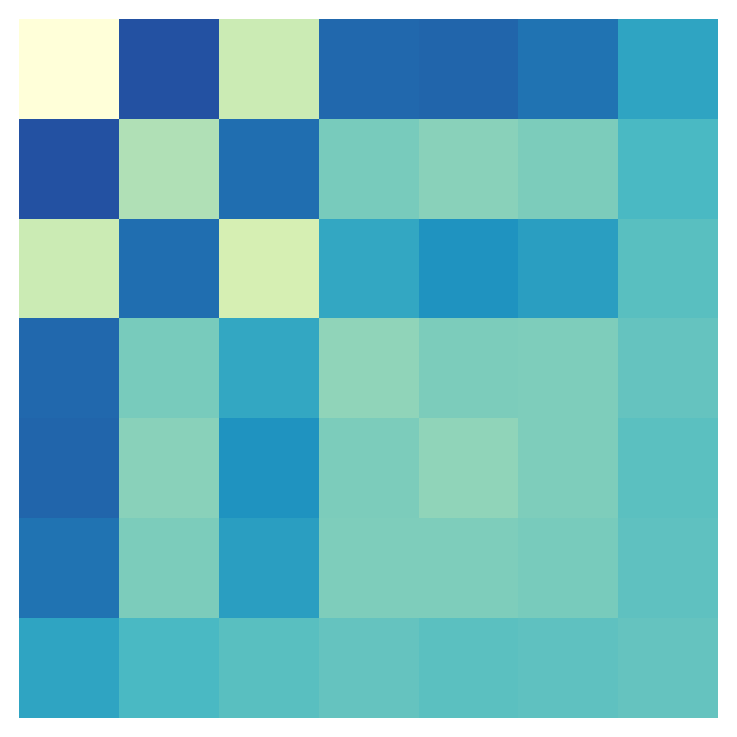

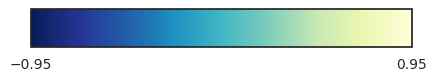

In [2]:
ltc = matrices.MicrostructuralCovarianceMatrix('thickness', 'sjh')
yeo = surfaces.YeoNetworks(parcellation_name='sjh')
ltc.associate_categorical_surface(yeo)

LTC G1 in association with the Yeo networks:

Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz
Loading the matrix from /home/asaberi/laminar_organization/code/../output/ltc/parc-sjh_curv-smooth-10_exc-adysgranular_metric-parcor/matrix.npz


/home/asaberi/laminar_organization/code/figures/../surfaces.py:1668: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  p_vals = (np.abs(null_dist) > np.abs(test_stats[:, np.newaxis])).mean(axis=1)


(F                                     81.539745
 Visual-Somatomotor                    20.633646
 Visual-Dorsal attention                2.192434
 Visual-Ventral attention              12.988934
 Visual-Limbic                         13.383189
 Visual-Frontoparietal                 13.438569
 Visual-Default                        12.537420
 Somatomotor-Dorsal attention         -13.820342
 Somatomotor-Ventral attention         -3.157738
 Somatomotor-Limbic                    -2.820430
 Somatomotor-Frontoparietal            -3.420316
 Somatomotor-Default                   -7.346196
 Dorsal attention-Ventral attention     8.356374
 Dorsal attention-Limbic                8.650350
 Dorsal attention-Frontoparietal        8.635759
 Dorsal attention-Default               7.636765
 Ventral attention-Limbic               0.245421
 Ventral attention-Frontoparietal      -0.064794
 Ventral attention-Default             -2.509160
 Limbic-Frontoparietal                 -0.310107
 Limbic-Default     

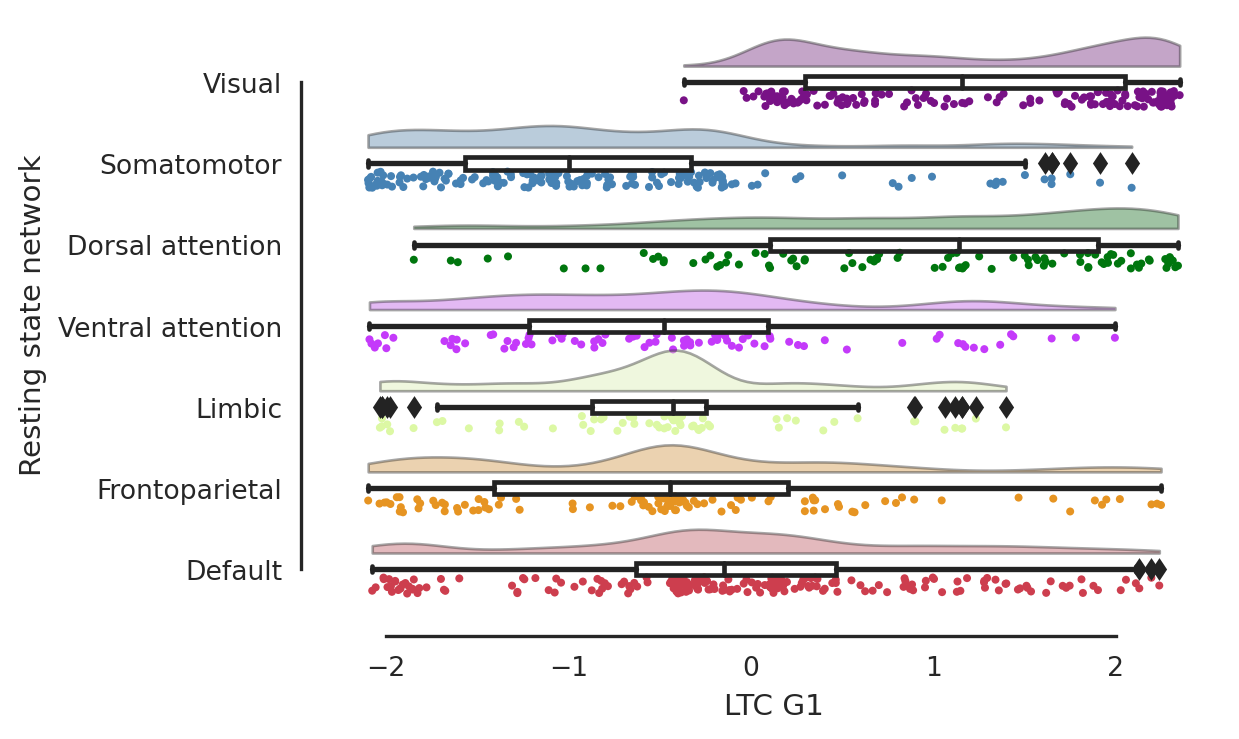

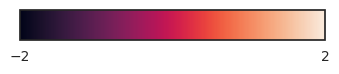

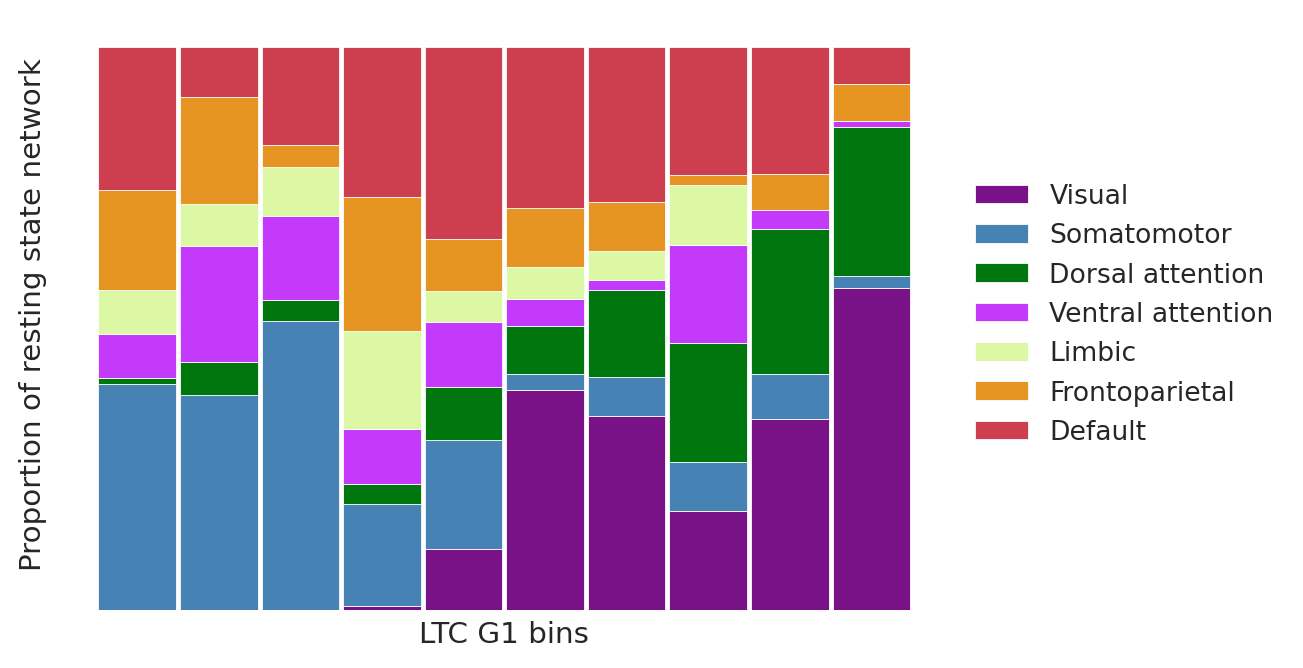

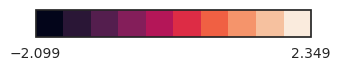

In [3]:
ltcg = surfaces.MicrostructuralCovarianceGradients(ltc)
yeo.compare(ltcg, ['LTC G1'])